<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

В данной работе необходимо подготовить прототип модели машинного обучения для помощи в принятии решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

В данном проекте нам предстоит построить модель, которая будет прогнозировать сразу две величины:
* эффективность обогащения чернового концентрата 'rougher.output.recovery';
* эффективность обогащения финального концентрата 'final.output.recovery'.

## Подготовка данных

Подключим необходимые библиотеки:

In [1]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [2]:
import pandas as pd
import numpy as np
from math import ceil
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

Загрузим и изучим наши данные:

In [3]:
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

Посмотрим на наши данные:

In [4]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
date                                          5290 non-null object
primary_cleaner.input.sulfate                 5286 non-null float64
primary_cleaner.input.depressant              5285 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5286 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatbank8_d_level      5290 non-null float64
rougher.in

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
date                                                  14149 non-null object
final.output.concentrate_ag                           14148 non-null float64
final.output.concentrate_pb                           14148 non-null float64
final.output.concentrate_sol                          13938 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14049 non-null float64
final.output.tail_sol                                 14144 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14129 non-null float64
primary_cleaner.input.depressant             

In [6]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
date                                                  19439 non-null object
final.output.concentrate_ag                           19438 non-null float64
final.output.concentrate_pb                           19438 non-null float64
final.output.concentrate_sol                          19228 non-null float64
final.output.concentrate_au                           19439 non-null float64
final.output.recovery                                 19439 non-null float64
final.output.tail_ag                                  19438 non-null float64
final.output.tail_pb                                  19338 non-null float64
final.output.tail_sol                                 19433 non-null float64
final.output.tail_au                                  19439 non-null float64
primary_cleaner.input.sulfate                         19415 non-null float64
primary_cleaner.input.depressant             

Так же посмотрем на размер наших данных

In [7]:
print(data_full.shape)
print(data_train.shape)
print(data_test.shape)

(19439, 87)
(14149, 87)
(5290, 53)


Наши данные не идеальны, есть пропуски, но пока не будем спешить их убирать. 

Для начала нам необходимо проверить, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака 'rougher.output.recovery'.

In [8]:
# функця расчета эфективности обогощения 
def recovery(raw):
    #rougher.output.recovery :
    c = raw['rougher.output.concentrate_au']
    f = raw['rougher.input.feed_au']
    t = raw['rougher.output.tail_au']
    
    return ((c*(f-t)) / (f*(c-t))) * 100

Далее посчитаем MAE между нашими расчётами и значением признака.

In [9]:
mean_absolute_error(data_train['rougher.output.recovery'],data_train.apply(recovery, axis=1))

9.682896147825551e-15

Значение MAE близко к нулю, это значит, что значение эффективности обогащения в данных рассчитано правильно.

Вернемся к размерам структур данных. В тестовой и тренировочной таблице разное количество столбцов. Посмотрим, что за параметры недоступны в тестовой выборке.

In [10]:
for column_name in list(data_train.columns):
    if column_name not in list(data_test.columns):
        print(column_name)

final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au
final.output.recovery
final.output.tail_ag
final.output.tail_pb
final.output.tail_sol
final.output.tail_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
primary_cleaner.output.tail_au
rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.concentrate_au
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_pb
rougher.output.tail_sol
rougher.output.tail_au
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_pb
secondary_cleaner.

В тестовой выборке отсутсвуют расчётные характеристики и параметры полученного продукта на всех этапах.

Данные полностью изучены. Перед началом анализа, нужно проверить их на корректность. Проведем предобработку:
* Инициализируем столбец  'date' к типу даты и времени.
* Избавимся от пропусков в столбцах.
* Проверим данные на дубликаты.


In [11]:
for data in [data_train, data_test, data_full]:    
    #пеерводим 'date' к типу даты и время
    data['date'] = pd.to_datetime(data['date'], format = '%Y-%m-%dT%H:%M:%S')

In [12]:
# посмотрим на пропуски в столбцах

report = data_full.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / data_full.shape[0]).round(2)
report.style.background_gradient(cmap = 'RdPu')

,missing_values,% of total
date,0,0
final.output.concentrate_ag,1,0
final.output.concentrate_pb,1,0
final.output.concentrate_sol,211,0.01
final.output.concentrate_au,0,0
final.output.recovery,0,0
final.output.tail_ag,1,0
final.output.tail_pb,101,0.01
final.output.tail_sol,6,0
final.output.tail_au,0,0


Их конечно немного, но просто удалить мы их не можем.  
Вспомним условие: «Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи». Так как соседние по времени параметры часто похожи, я предлагаю заполнить пропуски соседними значениями. 


In [13]:
# заполняем пропуски в полном датафрейме соседними значениями
data_full = data_full.sort_values(by='date').ffill().bfill()

In [14]:
report = data_full.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / data_full.shape[0]).round(2)
report.style.background_gradient(cmap = 'RdPu')

,missing_values,% of total
date,0,0
final.output.concentrate_ag,0,0
final.output.concentrate_pb,0,0
final.output.concentrate_sol,0,0
final.output.concentrate_au,0,0
final.output.recovery,0,0
final.output.tail_ag,0,0
final.output.tail_pb,0,0
final.output.tail_sol,0,0
final.output.tail_au,0,0


In [15]:
# далее заполним пропуски в тестовой и тренировочной выборках
# для проверки
print(data_train.shape, data_train.isna().sum().sum())
print(data_test.shape, data_test.isna().sum().sum())

(14149, 87) 4100
(5290, 53) 90


In [16]:
# а для заполнения пропусков в тренировочной и тестовой выборке
# просто перезапишем все нужные данные из data_full
data_train =  data_full[data_full['date'].isin(data_train['date'])][list(data_train.columns)]
data_test =  data_full[data_full['date'].isin(data_test['date'])][list(data_test.columns)]

In [17]:
print(data_train.shape, data_train.isna().sum().sum())
print(data_test.shape, data_test.isna().sum().sum())

(14149, 87) 0
(5290, 53) 0


In [18]:
# выведем количество дубликатов в таблицах
print(data_full.duplicated().sum())
print(data_train.duplicated().sum())
print(data_test.duplicated().sum())

0
0
0


### Вывод

    В это части работы мы изучили наши данные и проверили правильность значений признака 'rougher.output.recovery'. Далее мы провели предобработку данных. Для удобства изменили тип столбца 'date' и заполнили пропуски соседними значениями.

## Анализ данных

Мы перешли ко второй части нашего проекта
На данном этапе нам предстоит провести анализ данных, а именно:
*  посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки
* сравним распределения размеров гранул сырья на обучающей и тестовой выборках
* исследуем суммарную концентрацию всех веществ на разных стадиях (в сырье, в черновом и финальном концентратах)

In [19]:
# заранее определим стиль для наших графиков
plt.style.use('ggplot')

In [20]:
# посмотрим на значения конценрации золота на разных этапах
data_full[
    ['rougher.input.feed_au',
     'rougher.output.concentrate_au',
     'primary_cleaner.output.concentrate_au',
     'final.output.concentrate_au']
].describe()

,rougher.input.feed_au,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au
count,19439.000000,19439.000000,19439.000000,19439.000000
mean,8.266097,19.772000,32.119400,44.076513
std,1.955092,3.753600,5.627611,5.129784
min,0.010000,0.000000,0.000000,0.000000
25%,6.854384,18.802523,30.463140,43.402215
50%,8.125839,20.280214,32.841295,45.011244
75%,9.769917,21.717843,35.048006,46.275313
max,13.731330,28.824507,45.933934,52.756638


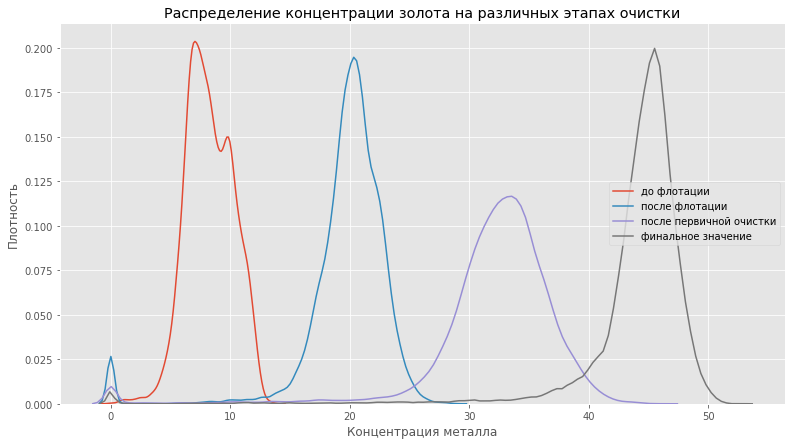

In [21]:
# построим график
plt.figure(figsize=(13,7))

sns.kdeplot(data_full['rougher.input.feed_au'], label = 'до флотации')
sns.kdeplot(data_full['rougher.output.concentrate_au'], label = 'после флотации')
sns.kdeplot(data_full['primary_cleaner.output.concentrate_au'], label = 'после первичной очистки')
sns.kdeplot(data_full['final.output.concentrate_au'], label = 'финальное значение')

plt.title('Распределение концентрации золота на различных этапах очистки')
plt.ylabel('Плотность')
plt.xlabel('Концентрация металла');

* В данной ситуации все логично. После каждой обработки концентрация в концентрате растет. Значит, что, скорее всего, мы делаем все правильно. Хвосты с низкой концентрацией ценных металлов отбрасываем, а золото оставляем.

In [22]:
# посмотрим на значения конценрации серебра на разных этапах
data_full[
    ['rougher.input.feed_ag',
     'rougher.output.concentrate_ag',
     'primary_cleaner.output.concentrate_ag',
     'final.output.concentrate_ag']
].describe()

,rougher.input.feed_ag,rougher.output.concentrate_ag,primary_cleaner.output.concentrate_ag,final.output.concentrate_ag
count,19439.000000,19439.000000,19439.000000,19439.000000
mean,8.794927,11.994759,8.442408,5.168387
std,1.936847,2.733862,2.054465,1.372362
min,0.010000,0.000000,0.000000,0.000000
25%,7.237967,10.628337,7.263288,4.251000
50%,8.593574,12.098115,8.507298,5.066039
75%,10.213771,13.736996,9.809001,5.895401
max,14.596026,24.480271,16.081632,16.001945


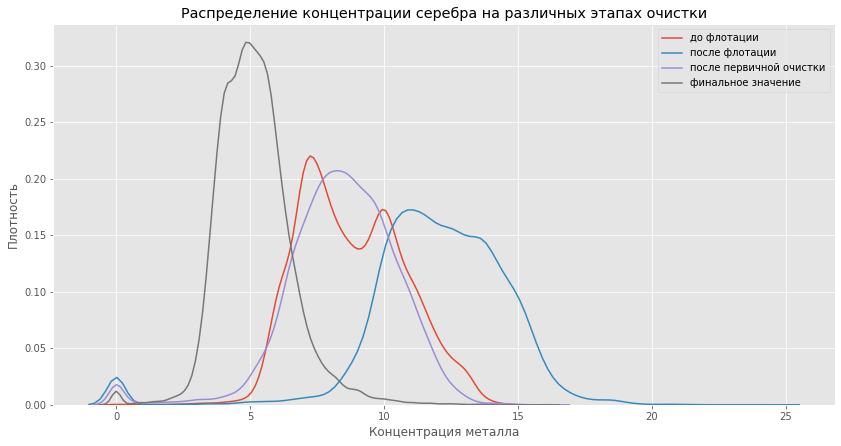

In [23]:
# построим график
plt.figure(figsize=(14,7))

sns.kdeplot(data_full['rougher.input.feed_ag'], label = 'до флотации')
sns.kdeplot(data_full['rougher.output.concentrate_ag'], label = 'после флотации')
sns.kdeplot(data_full['primary_cleaner.output.concentrate_ag'], label = 'после первичной очистки')
sns.kdeplot(data_full['final.output.concentrate_ag'], label = 'финальное значение')

plt.title('Распределение концентрации серебра на различных этапах очистки')
plt.ylabel('Плотность')
plt.xlabel('Концентрация металла');

* В случае с серебром картина не выглядит так гладко. После флотации концентрация металла в концентрате увеличивается. Но с последующими очистками концентрация падает. Оценивать этот факт я не могу, так что просто констатирую факт. (Возможно так все и должно быть)

In [24]:
# посмотрим на значения конценрации свинца на разных этапах
data_full[
    ['rougher.input.feed_pb',
     'rougher.output.concentrate_pb',
     'primary_cleaner.output.concentrate_pb',
     'final.output.concentrate_pb']
].describe()

,rougher.input.feed_pb,rougher.output.concentrate_pb,primary_cleaner.output.concentrate_pb,final.output.concentrate_pb
count,19439.000000,19439.000000,19439.000000,19439.000000
mean,3.585096,7.606272,9.810317,9.978821
std,1.062972,1.796757,2.572253,1.669228
min,0.010000,0.000000,0.000000,0.000000
25%,2.872178,6.725987,8.676500,9.137225
50%,3.528235,7.742580,10.142270,10.102264
75%,4.241005,8.565199,11.416298,11.035644
max,7.142594,13.617072,17.081278,17.031899


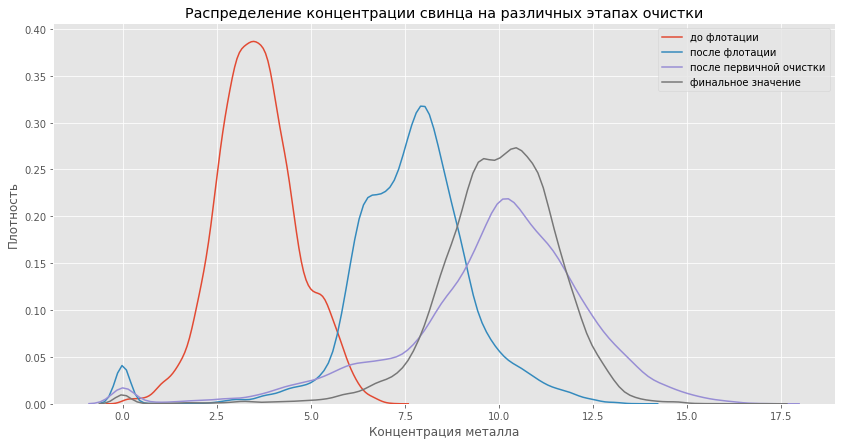

In [25]:
# построим график
plt.figure(figsize=(14,7))

sns.kdeplot(data_full['rougher.input.feed_pb'], label = 'до флотации')
sns.kdeplot(data_full['rougher.output.concentrate_pb'], label = 'после флотации')
sns.kdeplot(data_full['primary_cleaner.output.concentrate_pb'], label = 'после первичной очистки')
sns.kdeplot(data_full['final.output.concentrate_pb'], label = 'финальное значение')

plt.title('Распределение концентрации свинца на различных этапах очистки')
plt.ylabel('Плотность')
plt.xlabel('Концентрация металла');

* У свинца так же, как и у золота концентрация растет после каждой очистки, если не считать последнюю. Концентрация после второй очистки в среднем не растет. Возможно, на это тоже надо обратить внимание.

Далее сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Для этого построим график.

In [26]:
# посмотрим на значения размеров гранул сырья на обучающей и тестовой выборках
data_train['primary_cleaner.input.feed_size'].describe()

count    14149.000000
mean         7.322310
std          0.614062
min          1.080000
25%          6.960000
50%          7.290000
75%          7.700000
max         10.470000
Name: primary_cleaner.input.feed_size, dtype: float64

In [27]:
data_test['primary_cleaner.input.feed_size'].describe()

count    5290.000000
mean        7.266339
std         0.610219
min         5.650000
25%         6.890000
50%         7.250000
75%         7.600000
max        15.500000
Name: primary_cleaner.input.feed_size, dtype: float64

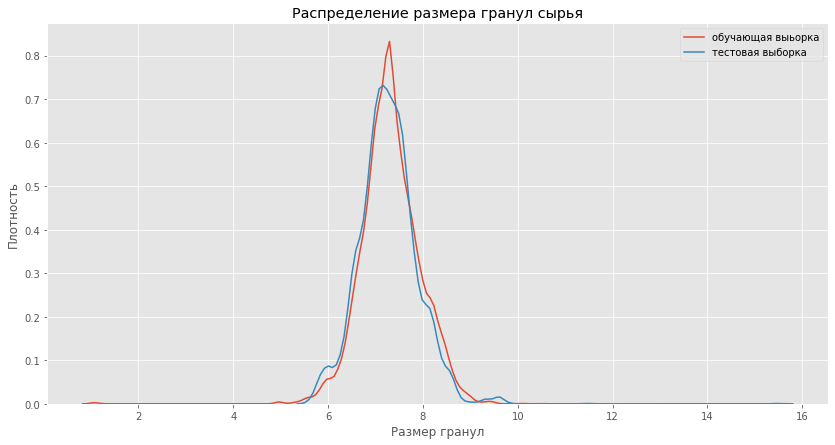

In [28]:
# построим график
plt.figure(figsize=(14,7))

sns.kdeplot(data_train['primary_cleaner.input.feed_size'], label = 'обучающая выьорка')
sns.kdeplot(data_test['primary_cleaner.input.feed_size'], label = 'тестовая выборка')

plt.title('Распределение размера гранул сырья')
plt.ylabel('Плотность')
plt.xlabel('Размер гранул');

В распределениях сильные различия не наблюдаются. Значит это не сможет повлиять на плохую работу модели.

Последний шажок перед созданием модели. Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [29]:
# для этого создаем столбцы со значением концентрации всех веществ на разных стадиях

data_full['rougher.input.feed_sum'] = data_full['rougher.input.feed_pb'] + data_full['rougher.input.feed_au'] + data_full['rougher.input.feed_ag']
data_full['rougher.output.concentrate_sum'] = data_full['rougher.output.concentrate_pb'] + data_full['rougher.output.concentrate_au'] + data_full['rougher.output.concentrate_ag']
data_full['primary_cleaner.output.concentrate_sum'] = data_full['primary_cleaner.output.concentrate_pb'] + data_full['primary_cleaner.output.concentrate_au'] + data_full['primary_cleaner.output.concentrate_ag']
data_full['final.output.concentrate_sum'] = data_full['final.output.concentrate_pb'] + data_full['final.output.concentrate_au'] + data_full['final.output.concentrate_ag']

In [30]:
data_full[['rougher.input.feed_sum',
           'rougher.output.concentrate_sum',
           'primary_cleaner.output.concentrate_sum',
           'final.output.concentrate_sum']
         ].describe()

,rougher.input.feed_sum,rougher.output.concentrate_sum,primary_cleaner.output.concentrate_sum,final.output.concentrate_sum
count,19439.000000,19439.000000,19439.000000,19439.000000
mean,20.646120,39.373032,50.372125,59.223721
std,4.480027,6.863389,7.628095,6.095138
min,0.030000,0.000000,0.000000,0.000000
25%,17.252879,38.394639,50.053899,59.298323
50%,20.141216,40.312648,51.909156,60.306921
75%,23.797381,42.365102,53.386898,61.096667
max,33.498784,55.568687,60.269003,64.968881


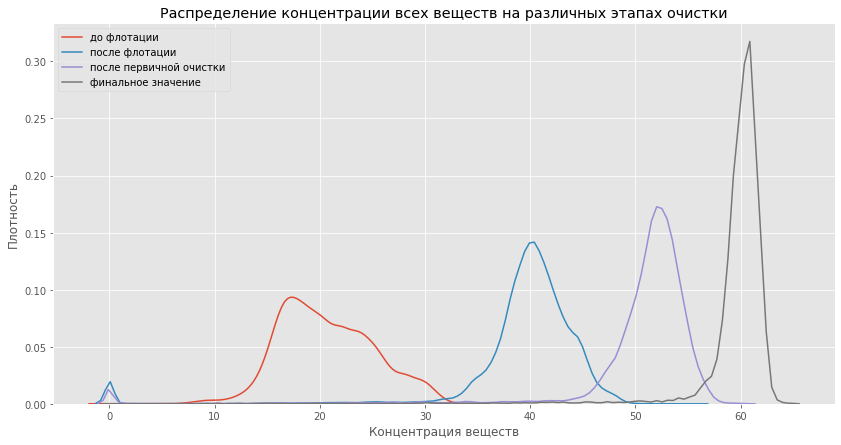

In [31]:
# построим график
plt.figure(figsize=(14,7))

sns.kdeplot(data_full['rougher.input.feed_sum'], label = 'до флотации')
sns.kdeplot(data_full['rougher.output.concentrate_sum'], label = 'после флотации')
sns.kdeplot(data_full['primary_cleaner.output.concentrate_sum'], label = 'после первичной очистки')
sns.kdeplot(data_full['final.output.concentrate_sum'], label = 'финальное значение')

plt.title('Распределение концентрации всех веществ на различных этапах очистки')
plt.ylabel('Плотность')
plt.xlabel('Концентрация веществ');

Мы получили красивое и логичное распределение, после каждой очистки, концентрация веществ увеличивается.
Так же выведем распределение значений суммарной концентрации ценных металлов в концентрате.

Text(0, 0.5, 'Концентрация')

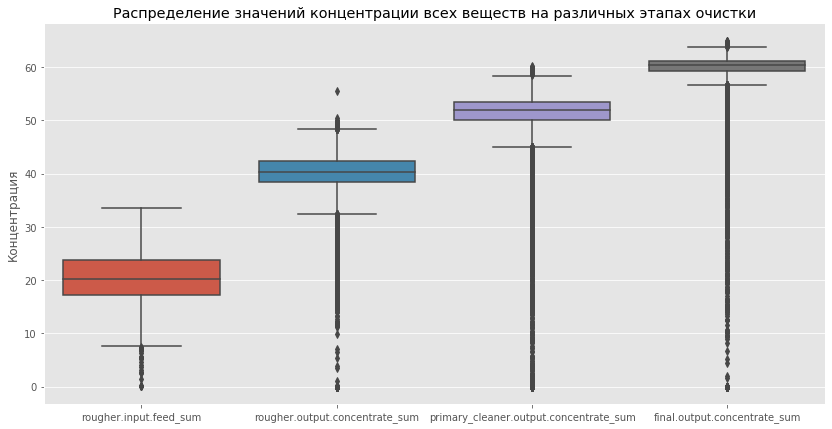

In [32]:
plt.figure(figsize=(14,7))
ax = sns.boxplot(data=data_full[['rougher.input.feed_sum', 
                            'rougher.output.concentrate_sum', 
                            'primary_cleaner.output.concentrate_sum', 
                            'final.output.concentrate_sum'  ]])
ax.set_title('Распределение значений концентрации всех веществ на различных этапах очистки')
ax.set_ylabel('Концентрация')

На каждом этапе наблюдаются выбросы. Больше наблюдаются выбросы в меньшую сторону. Скорее всего это говорит о том, что в нашу установку изначально подаются смесь с слишком маленькой концентрацией драгоценных металлов.

### Вывод

    На этом этапе работы проделали анализ данных. Посмотрели, как меняется концентрация каждого металла и их сумма на каждом этапе очистки. Заметили странную закономерность с серебром, что после первичной и вторичной очистки его концентрация черновом концентрате уменьшается. Удостоверились, что размер гранул сырья в обучающей и тестовой выборке, в среднем, почти не отличаются, в противном случае это могло способствовать плохой работе модели. 

## Модель

На данном (заключительном) этапе проекта нам предстоит смоделировать процесс восстановления золота из золотосодержащей руды. Для этого нам необходимо построить две модели, которые будут предсказывать эффективность обогащения после флотации (черновой концентрат) и для финального концентрата. 
Для начала напишем функцию, которая будет рассчитывать метрику sMAPE, которая будет проверять процентное отклонение ответов алгоритма от истинных значений.

In [33]:
# функция расчета sMAPE
# не уверен, что она работает корректно, но вроде сделал все по формуле

def smape_scorer(target, predictions):
    
    predictions = pd.DataFrame(predictions, columns=['predictions'])
    target = target.to_frame()
    target_name = target.columns[0]
    summ = 0
    
    summ = (((target[target_name] - predictions['predictions']).abs()) / ((target[target_name].abs() + predictions['predictions'].abs()) / 2)).sum()
    smape = summ * 100 / len(target)
    
    return(smape)

Функцию для расчета метрики точность рассчитали. Далее подготовим признаки для модели. Так как у нас две модели, то и целевых признака у нас два ('final.output.recovery',  'rougher.output.recovery'). Признаки у них будут тоже различаться. Для 'rougher.output.recovery' выберем параметры сырья и  параметры, характеризующие текущее состояние этапа, которые подаются перед флотацией. 
А для 'final.output.recovery' параметры сырья и  параметры, характеризующие текущее состояние этапа, каждого этапа.

In [34]:
# признаки для обучения первой модели
col_name_for_first = [
    'rougher.input.feed_ag',
    'rougher.input.feed_pb',
    'rougher.input.feed_rate',
    'rougher.input.feed_size',
    'rougher.input.feed_sol',
    'rougher.input.feed_au',
    'rougher.input.floatbank10_sulfate',
    'rougher.input.floatbank10_xanthate',
    'rougher.input.floatbank11_sulfate',
    'rougher.input.floatbank11_xanthate',
    'rougher.state.floatbank10_a_air',
    'rougher.state.floatbank10_a_level',
    'rougher.state.floatbank10_b_air',
    'rougher.state.floatbank10_b_level',
    'rougher.state.floatbank10_c_air',
    'rougher.state.floatbank10_c_level',
    'rougher.state.floatbank10_d_air',
    'rougher.state.floatbank10_d_level',
    'rougher.state.floatbank10_e_air',
    'rougher.state.floatbank10_e_level',
    'rougher.state.floatbank10_f_air',
    'rougher.state.floatbank10_f_level'
]

In [35]:
# разделим целевой и общий признак
features_train_1 = data_train[col_name_for_first]
features_train_2 = data_train[list(data_test.columns)].drop(['date'], axis=1)
features_test_1 = data_test[col_name_for_first]
features_test_2 = data_test[list(data_test.columns)].drop(['date'], axis=1)

target_train_1 = data_train['rougher.output.recovery']
target_train_2 = data_train['final.output.recovery']
target_test_1 = data_full[data_full['date'].isin(data_test['date'])]['rougher.output.recovery']
target_test_2 = data_full[data_full['date'].isin(data_test['date'])]['final.output.recovery']

In [36]:
# проверим размер выборок

print(features_train_1.shape, features_train_2.shape, target_train_1.shape, target_train_2.shape)
print(features_test_1.shape, features_test_2.shape, target_test_1.shape, target_test_2.shape)

(14149, 22) (14149, 52) (14149,) (14149,)
(5290, 22) (5290, 52) (5290,) (5290,)


Далее, с помощью GridSearchCV, будем подбирать лучшие гиперпараметры для каждой модели. За метрику качества возьмем, уже написанную, функцию smape_scorer. 

Для начала рассмотрим признак 'rougher.output.recovery'

In [37]:
# преобразуем нашу функцию, чтобы использовать её при оценке модели
my_scorer = make_scorer(smape_scorer, greater_is_better=False)

Теперь подберем лучшие гиперпараметры для случайного леса и рассчитаем среднюю оценку smape_scorer.

In [38]:
RFR_parametrs = { 'n_estimators': range(5, 41, 5),
              'max_depth': range (1,16, 2)}

In [39]:
RFR_grid_1 = GridSearchCV(RandomForestRegressor(random_state=300500), param_grid=RFR_parametrs, scoring=my_scorer, cv=4)

In [40]:
RFR_grid_1.fit(features_train_1, target_train_1)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False,
                                             random_state=300500, verbose=0,
                                             warm_start=False),
             iid='warn', n_jobs=None,
         

In [41]:
print('RandomForestRegressor')
print(f'Лучше всего себя проявила модель c гиперпараметрами:', RFR_grid_1.best_params_)
print(f'Средняя оценка smape_scorer = {RFR_grid_1.best_score_ * -1}')
# умножаем на -1 так как при создании метрики мы указали 'greater_is_better=False', а сделали мы это для того, чтобы gridsearch 
# искал самое маленькое значение smape_scorer

RandomForestRegressor
Лучше всего себя проявила модель c гиперпараметрами: {'max_depth': 1, 'n_estimators': 5}
Средняя оценка smape_scorer = 2.7914792422104875


Лучшее значение метрики, которое удалось достичь, используя RandomForestRegressor, равна 2.8. Далее проверим какое значение smape_scorer можно получить используя модель DecisionTreeRegressor.

In [42]:
parametrs_DTR = {'max_depth': range (1,30, 2)}

In [43]:
grid_DTR_1 = GridSearchCV(DecisionTreeRegressor(random_state=300500), param_grid=parametrs_DTR, scoring=my_scorer, cv=4)

In [55]:
grid_DTR_1.fit(features_train_1, target_train_1)

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=300500,
                                             splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(1, 30, 2)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(smape_scorer, greater_is_better=False),
             verbo

In [45]:
print('DecisionTreeRegressor')
print(f'Лучше всего себя проявила модель c гиперпараметрами:', grid_DTR_1.best_params_)
print(f'Средняя оценка smape_scorer = {grid_DTR_1.best_score_ * -1}')

DecisionTreeRegressor
Лучше всего себя проявила модель c гиперпараметрами: {'max_depth': 1}
Средняя оценка smape_scorer = 2.790596440648402


Данная модель показала себя лучше. Для предсказания 'rougher.output.recovery' используем модель DecisionTreeRegressor() с 'max_depth' равным 1.

Далее подберем модель для признака 'final.output.recovery'.

In [46]:
RFR_grid_2 = GridSearchCV(RandomForestRegressor(random_state=300500), param_grid=RFR_parametrs, scoring=my_scorer, cv=4)

In [47]:
RFR_grid_2.fit(features_train_2, target_train_2)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False,
                                             random_state=300500, verbose=0,
                                             warm_start=False),
             iid='warn', n_jobs=None,
         

In [48]:
print('RandomForestRegressor')
print(f'Лучше всего себя проявила модель c гиперпараметрами:', RFR_grid_2.best_params_)
print(f'Средняя оценка smape_scorer = {RFR_grid_2.best_score_ * -1}')

RandomForestRegressor
Лучше всего себя проявила модель c гиперпараметрами: {'max_depth': 1, 'n_estimators': 5}
Средняя оценка smape_scorer = 2.5604134711137334


Лучшее значение метрики, которое удалось достичь, используя RandomForestRegressor, равна 2.56. Далее проверим какое значение smape_scorer можно достичь, используя DecisionTreeRegressor.

In [49]:
grid_DTR_2 = GridSearchCV(DecisionTreeRegressor(random_state=300500), param_grid=parametrs_DTR, scoring=my_scorer, cv=4)

In [50]:
grid_DTR_2.fit(features_train_2, target_train_2)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=300500,
                                             splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(1, 30, 2)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(smape_scorer, greater_is_better=False),
             verbo

In [51]:
print('DecisionTreeRegressor')
print(f'Лучше всего себя проявила модель c гиперпараметрами:', grid_DTR_2.best_params_)
print(f'Средняя оценка smape_scorer = {grid_DTR_2.best_score_ * -1}')

DecisionTreeRegressor
Лучше всего себя проявила модель c гиперпараметрами: {'max_depth': 1}
Средняя оценка smape_scorer = 2.6357205562475285


Данная модель показала себя хуже, так что для определения признака 'final.output.recovery' будем использовать модель RandomForestRegressor с 'max_depth' = 1 и 'n_estimators' = 5.

Параметры для моделей выбраны, теперь проверим их на тестовой выборке.

In [52]:
# обчим наши модели и получим предсказания
model_1 = DecisionTreeRegressor(random_state=300500, max_depth=1).fit(features_train_1, target_train_1)
model_2 = RandomForestRegressor(
    random_state=300500, max_depth=1, n_estimators=5).fit(features_train_2, target_train_2)

predicted_test_1 = model_1.predict(features_test_1)
predicted_test_2 = model_2.predict(features_test_2)

#рассчитаем значение метрики sMAPE для каждой модели
smape_score_1 = smape_scorer(target_test_1, predicted_test_1)
smape_score_2 = smape_scorer(target_test_2, predicted_test_2)

# рассчитаем финальное значение метрики sMAPE
final_smape_score = 0.25*smape_score_1 + 0.75*smape_score_2
print(f'Итоговое sMAPE наших моделей = {final_smape_score}')

Итоговое sMAPE наших моделей = 1.6853374308321598


Значение метрики мы получили, но это ещё не все. Проверим наши модели на вменяемость. Построим две случайные модели, которые предсказывать средними значениями и посчитаем для них Итоговое значение sMAPE.

In [53]:
dummy_model_1 = DummyRegressor(strategy='mean').fit(features_train_1, target_train_1)
dummy_model_2 = DummyRegressor(strategy='mean').fit(features_train_2, target_train_2)

dummy_predicted_1 = dummy_model_1.predict(features_test_1)
dummy_predicted_2 = dummy_model_1.predict(features_test_1)

dummy_smape_1 = smape_scorer(target_test_1, dummy_predicted_1)
dummy_smape_2 = smape_scorer(target_test_2, dummy_predicted_2)

dummy_final_smape = 0.25*dummy_smape_1 + 0.75*dummy_smape_2
print(f'Итоговое sMAPE случайной модели = {dummy_final_smape}')

Итоговое sMAPE случайной модели = 3.1994233830913883


### Вывод

    На данном, заключительном, этапе работы мы обучили разные модели и оценили их метрикой качества sMAPE кросс-валидацией. Для первого признака лучшей моделью оказалась модель DecisionTreeRegressor() с 'max_depth' равным 1. Для второго признака модель RandomForestRegressor с 'max_depth' = 1 и 'n_estimators' = 5. 
    Проверили наши модели на тестовой выборке, итоговое значение метрики sMAPE равно 1.7. В то время как итоговое значение метрики sMAPE Dummy модели равно 3.2, что говорит нам о том, что наши модели предсказывают не впустую.


## Вывод

        В данной работе мы построили две модели, которые прогнозировали значения: эффективность обогащения чернового концентрата 'rougher.output.recovery' и эффективность обогащения финального концентрата 'final.output.recovery'. Мы провели предобработку и анализ данных. Затем, при помощи кросс-валидации, подобрали модели, которые на выдавали лучшее значение метрики качества sMAPE. Лучшие модели проверили на тестовой выборке и сравнили их с моделью заполнения средними. Наши модели выдали итоговое значение sMAPE равное 1.7, в то время как случайная модель выдала итоговое sMAPE 3.2. Из этого мы можем сделать вывод, что наша модель прошла проверку на вменяемость.